## Linear and Logistic Regression
### Demo

In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [854]:
data = pd.read_csv('data/StockX-Data-Contest-2019-3.csv')
data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


In [855]:
data = data.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [856]:
any(~data.sale_price.str.startswith('$'))

False

In [857]:
any(~data.retail_price.str.startswith('$'))

False

In [858]:
def replace_dollar_sign(dataset, target_column):
    dataset[target_column] = dataset[target_column].str.replace('$', '').str.replace(',', '').astype(float)

    return dataset

In [859]:
replace_dollar_sign(data, 'sale_price')
replace_dollar_sign(data, 'retail_price')

,order_date,brand,sneaker_name,sale_price,retail_price,release_date,shoe_size,buyer_region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220.0,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220.0,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220.0,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220.0,12/26/18,11.0,California


In [860]:
def show_hist(dataset, target_column):
    plt.figure(figsize=(12, 5))
    plt.hist(dataset[target_column], bins='auto')
    plt.xlabel('Sale price')
    plt.ylabel('Count')
    plt.show()

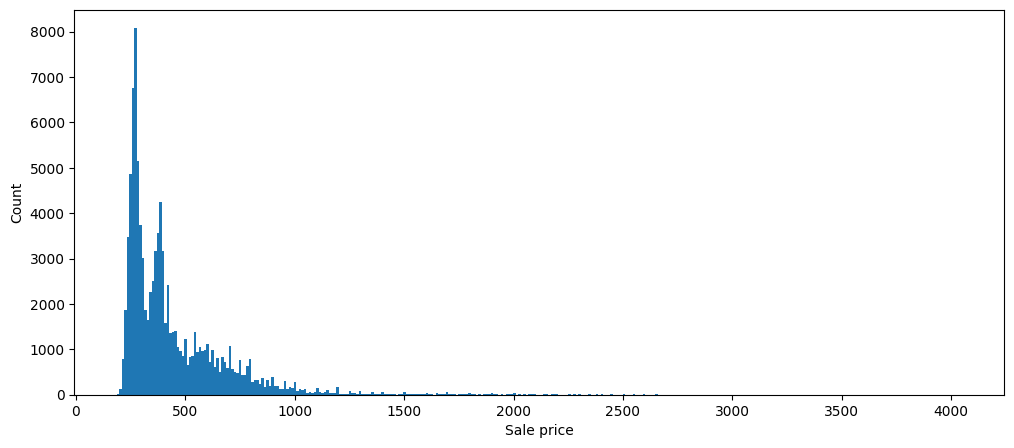

In [861]:
show_hist(data, 'sale_price')

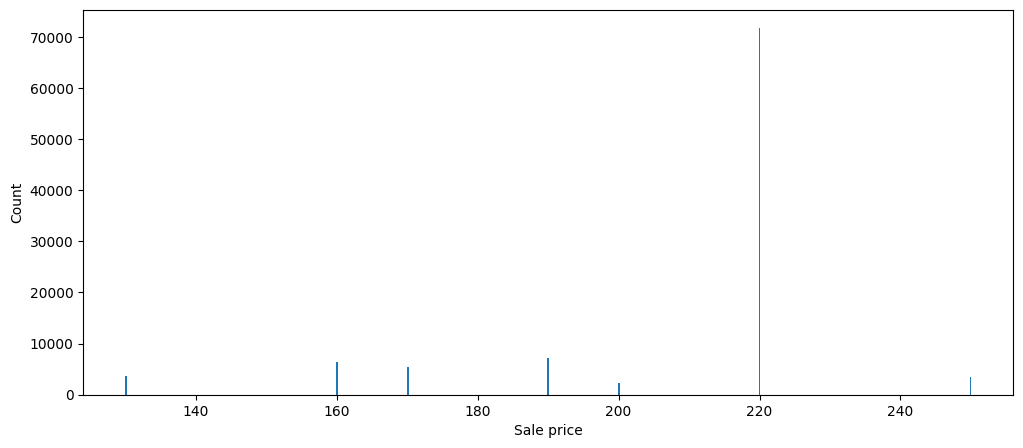

In [862]:
show_hist(data, 'retail_price')

In [863]:
data.brand = data.brand.str.strip()
data.brand.value_counts()

brand
Yeezy        72162
Off-White    27794
Name: count, dtype: int64

##### Conclusion: This imbalance maybe negatively affect classification performance

In [864]:
def labeled_data_and_drop_column(dataset, target_column):
    dataset = pd.concat([dataset, pd.get_dummies(data[target_column], drop_first=True).astype(int)], axis=1)
    dataset = dataset.drop(columns=[target_column])

    return dataset

In [865]:
data = labeled_data_and_drop_column(data, 'buyer_region')

In [866]:
data = labeled_data_and_drop_column(data, 'brand')

In [867]:
data

,order_date,sneaker_name,sale_price,retail_price,release_date,shoe_size,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Yeezy
0,9/1/17,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220.0,9/24/16,11.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220.0,11/23/16,11.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220.0,11/23/16,11.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220.0,11/23/16,11.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9/1/17,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220.0,2/11/17,11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220.0,12/26/18,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99952,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220.0,12/26/18,8.5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
99953,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220.0,12/26/18,5.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99954,2/13/19,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220.0,12/26/18,11.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [868]:
data = data.drop(columns=['sneaker_name'])

In [869]:
data

,order_date,sale_price,retail_price,release_date,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Yeezy
0,9/1/17,1097.0,220.0,9/24/16,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,9/1/17,685.0,220.0,11/23/16,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,9/1/17,690.0,220.0,11/23/16,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9/1/17,1075.0,220.0,11/23/16,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9/1/17,828.0,220.0,2/11/17,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2/13/19,565.0,220.0,12/26/18,8.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99952,2/13/19,598.0,220.0,12/26/18,8.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
99953,2/13/19,605.0,220.0,12/26/18,5.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99954,2/13/19,650.0,220.0,12/26/18,11.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [870]:
def date_formated(dataset, target_column):
    return pd.to_datetime(dataset[target_column], format='%m/%d/%y')

In [871]:
data['order_date'] = date_formated(data, 'order_date')
data['release_date'] = date_formated(data, 'release_date')

In [872]:
dates = pd.DataFrame(
    {
    'order_day': data.order_date.dt.day,
    'order_month':data.order_date.dt.month,
    'order_year':data.order_date.dt.year,
    'release_day':data.release_date.dt.day,
    'release_month':data.release_date.dt.month,
    'release_year':data.release_date.dt.year
 }
)
data = pd.concat([data, dates], axis=1).drop(columns=['order_date', 'release_date'])

In [873]:
data

,sale_price,retail_price,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,West Virginia,Wisconsin,Wyoming,Yeezy,order_day,order_month,order_year,release_day,release_month,release_year
0,1097.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,1,1,9,2017,24,9,2016
1,685.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
2,690.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
3,1075.0,220.0,11.5,0,0,0,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
4,828.0,220.0,11.0,0,0,0,0,0,0,0,...,0,0,0,1,1,9,2017,11,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220.0,8.0,0,0,0,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99952,598.0,220.0,8.5,0,0,0,1,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99953,605.0,220.0,5.5,0,0,0,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99954,650.0,220.0,11.0,0,0,0,1,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018


In [874]:
attributes = data.drop(columns='sale_price')

In [875]:
targets  = data.sale_price

In [876]:
attributes

,retail_price,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,West Virginia,Wisconsin,Wyoming,Yeezy,order_day,order_month,order_year,release_day,release_month,release_year
0,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,9,2017,24,9,2016
1,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
2,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
3,220.0,11.5,0,0,0,0,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
4,220.0,11.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,9,2017,11,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,220.0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99952,220.0,8.5,0,0,0,1,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99953,220.0,5.5,0,0,0,0,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99954,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018


In [877]:
targets

0        1097.0
1         685.0
2         690.0
3        1075.0
4         828.0
          ...  
99951     565.0
99952     598.0
99953     605.0
99954     650.0
99955     640.0
Name: sale_price, Length: 99956, dtype: float64

In [878]:
model = LinearRegression()

In [879]:
model.fit(attributes, targets)

LinearRegression()

In [880]:
list(zip(attributes.columns, model.coef_))

[('retail_price', np.float64(0.12461522067216882)),
 ('shoe_size', np.float64(3.0209093279429666)),
 ('Alaska', np.float64(1.2297546344023687)),
 ('Arizona', np.float64(20.591066546940503)),
 ('Arkansas', np.float64(11.816277967525707)),
 ('California', np.float64(33.976338659909686)),
 ('Colorado', np.float64(10.251371707574634)),
 ('Connecticut', np.float64(-1.3659192484861364)),
 ('Delaware', np.float64(86.30223468153504)),
 ('District of Columbia', np.float64(23.631037561654704)),
 ('Florida', np.float64(13.70145808242253)),
 ('Georgia', np.float64(5.7417111148014826)),
 ('Hawaii', np.float64(20.132708635105942)),
 ('Idaho', np.float64(-17.66494197122549)),
 ('Illinois', np.float64(8.043132308187303)),
 ('Indiana', np.float64(8.125523935262429)),
 ('Iowa', np.float64(24.216884381578193)),
 ('Kansas', np.float64(20.051691712055607)),
 ('Kentucky', np.float64(54.66415647898555)),
 ('Louisiana', np.float64(5.741830251919366)),
 ('Maine', np.float64(-5.483944856439326)),
 ('Maryland', 

In [881]:
model.score(attributes, targets)

0.44270842811958455

In [882]:
attributes

,retail_price,shoe_size,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,West Virginia,Wisconsin,Wyoming,Yeezy,order_day,order_month,order_year,release_day,release_month,release_year
0,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,9,2017,24,9,2016
1,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
2,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
3,220.0,11.5,0,0,0,0,0,0,0,0,...,0,0,0,1,1,9,2017,23,11,2016
4,220.0,11.0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,9,2017,11,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,220.0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99952,220.0,8.5,0,0,0,1,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99953,220.0,5.5,0,0,0,0,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018
99954,220.0,11.0,0,0,0,1,0,0,0,0,...,0,0,0,1,13,2,2019,26,12,2018


In [883]:
targets

0        1097.0
1         685.0
2         690.0
3        1075.0
4         828.0
          ...  
99951     565.0
99952     598.0
99953     605.0
99954     650.0
99955     640.0
Name: sale_price, Length: 99956, dtype: float64

In [884]:
scaler = MinMaxScaler()

In [885]:
attrib = scaler.fit(attributes)

In [886]:
attrib = scaler.transform(attributes)
attrib

array([[0.75      , 0.55555556, 0.        , ..., 0.79310345, 0.7       ,
        0.25      ],
       [0.75      , 0.55555556, 0.        , ..., 0.75862069, 0.9       ,
        0.25      ],
       [0.75      , 0.55555556, 0.        , ..., 0.75862069, 0.9       ,
        0.25      ],
       ...,
       [0.75      , 0.14814815, 0.        , ..., 0.86206897, 1.        ,
        0.75      ],
       [0.75      , 0.55555556, 0.        , ..., 0.86206897, 1.        ,
        0.75      ],
       [0.75      , 0.59259259, 0.        , ..., 0.86206897, 1.        ,
        0.75      ]], shape=(99956, 59))

In [887]:
scaled_model = LinearRegression()

In [888]:
scaled_model.fit(attrib, targets)

LinearRegression()

In [889]:
scaled_model.coef_

array([ 1.49538265e+01,  4.07822759e+01,  1.22975463e+00,  2.05910665e+01,
        1.18162780e+01,  3.39763387e+01,  1.02513717e+01, -1.36591925e+00,
        8.63022347e+01,  2.36310376e+01,  1.37014581e+01,  5.74171111e+00,
        2.01327086e+01, -1.76649420e+01,  8.04313231e+00,  8.12552394e+00,
        2.42168844e+01,  2.00516917e+01,  5.46641565e+01,  5.74183025e+00,
       -5.48394486e+00,  8.96922169e+00,  1.49132456e+01,  1.69441622e+01,
        1.10148804e+01, -2.15590805e+00,  1.11908722e+01,  1.87005695e+01,
        1.65713308e+01,  4.45810141e+01,  3.23563746e+00,  2.24323203e+01,
        1.45058760e+01,  2.21649199e+01,  1.42549767e+00,  6.54344593e+00,
        3.59992671e+00,  5.90944385e+00,  6.67730499e+01,  1.15307449e+01,
        1.36119678e-02,  1.38046256e+01,  1.19698372e+01,  1.73466203e+01,
        6.48888157e+00,  8.39915232e+00,  1.00167366e+01,  1.79457169e+01,
        1.70890001e+01,  1.57083531e-01,  1.44930906e+01,  1.06387866e+01,
       -3.66662415e+02,  

In [890]:
list(zip(attributes.columns, scaled_model.coef_))

[('retail_price', np.float64(14.953826480655938)),
 ('shoe_size', np.float64(40.782275927241585)),
 ('Alaska', np.float64(1.229754634407584)),
 ('Arizona', np.float64(20.591066546940226)),
 ('Arkansas', np.float64(11.816277967525997)),
 ('California', np.float64(33.976338659910255)),
 ('Colorado', np.float64(10.25137170757688)),
 ('Connecticut', np.float64(-1.3659192484856248)),
 ('Delaware', np.float64(86.30223468153567)),
 ('District of Columbia', np.float64(23.631037561655344)),
 ('Florida', np.float64(13.701458082422846)),
 ('Georgia', np.float64(5.741711114802115)),
 ('Hawaii', np.float64(20.132708635106972)),
 ('Idaho', np.float64(-17.66494197122472)),
 ('Illinois', np.float64(8.043132308188063)),
 ('Indiana', np.float64(8.12552393526294)),
 ('Iowa', np.float64(24.2168843815791)),
 ('Kansas', np.float64(20.051691712056055)),
 ('Kentucky', np.float64(54.66415647898595)),
 ('Louisiana', np.float64(5.741830251919609)),
 ('Maine', np.float64(-5.483944856438358)),
 ('Maryland', np.flo

In [891]:
scaled_model.score(attrib, targets)

0.4427084281195779

In [892]:
poly_transformer = PolynomialFeatures()
poly_transformer.fit(attributes)

PolynomialFeatures()

In [893]:
poly_transformer.n_output_features_

1830

In [894]:
attr_squared = poly_transformer.transform(attributes)

In [895]:
attr_squared

array([[1.000000e+00, 2.200000e+02, 1.100000e+01, ..., 8.100000e+01,
        1.814400e+04, 4.064256e+06],
       [1.000000e+00, 2.200000e+02, 1.100000e+01, ..., 1.210000e+02,
        2.217600e+04, 4.064256e+06],
       [1.000000e+00, 2.200000e+02, 1.100000e+01, ..., 1.210000e+02,
        2.217600e+04, 4.064256e+06],
       ...,
       [1.000000e+00, 2.200000e+02, 5.500000e+00, ..., 1.440000e+02,
        2.421600e+04, 4.072324e+06],
       [1.000000e+00, 2.200000e+02, 1.100000e+01, ..., 1.440000e+02,
        2.421600e+04, 4.072324e+06],
       [1.000000e+00, 2.200000e+02, 1.150000e+01, ..., 1.440000e+02,
        2.421600e+04, 4.072324e+06]], shape=(99956, 1830))

In [896]:
quadratic_model = LinearRegression()

In [897]:
quadratic_model.fit(attr_squared, targets)

LinearRegression()

In [898]:
quadratic_model.score(attr_squared, targets)

0.7182154083551999